In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
os.chdir('/Users/Jonathan/citiBike_NYC')

/Users/Jonathan/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Read data only for November 2015
tripData = pd.read_csv('data/201511-citibike-tripdata.csv')
tripData.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1110,11/1/2015 00:00:00,11/1/2015 00:18:31,537,Lexington Ave & E 24 St,40.740259,-73.984092,531,Forsyth St & Broome St,40.718939,-73.992663,22545,Subscriber,1981,2
1,1094,11/1/2015 00:00:01,11/1/2015 00:18:15,537,Lexington Ave & E 24 St,40.740259,-73.984092,531,Forsyth St & Broome St,40.718939,-73.992663,23959,Subscriber,1980,1
2,520,11/1/2015 00:00:05,11/1/2015 00:08:45,536,1 Ave & E 30 St,40.741444,-73.975361,498,Broadway & W 32 St,40.748549,-73.988084,22251,Subscriber,1988,1
3,753,11/1/2015 00:00:15,11/1/2015 00:12:48,229,Great Jones St,40.727434,-73.993790,328,Watts St & Greenwich St,40.724055,-74.009660,15869,Subscriber,1981,1
4,353,11/1/2015 00:00:22,11/1/2015 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,151,Cleveland Pl & Spring St,40.722104,-73.997249,21645,Subscriber,1987,1


In [3]:
tripData.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [4]:
tripData.shape

(987245, 15)

In [5]:
# Parse dates
from datetime import datetime

a = tripData.starttime[0]
print a
datetime.now()
#datetime.strptime(a,'%m/%d/%Y')
#datetime.datetime(2010,1,1,0,0)
b = datetime.strptime(a,"%m/%d/%Y %H:%M:%S")
b

11/1/2015 00:00:00


datetime.datetime(2015, 11, 1, 0, 0)

In [6]:
# dates = [datetime.strptime(x,"%m/%d/%Y %H:%M:%S") for x in tripData.starttime]
# dates[:10]

# can also use:
# from dateutil.parser import parse
# [parse(x) for x in data.starttime]

In [7]:
# from dateutil.parser import parse
# new = pd.Series(np.random.randn(100), index = pd.date_range(parse(data.starttime[0]),periods = 100))
# new.plot()

In [8]:
# How many bikes are there?
len((tripData.bikeid.unique()))

7694

In [9]:
# Proportion of male / female (0 is unknown)
(tripData.gender.value_counts() / tripData.gender.shape[0] * 100).round(2)

1    68.34
2    21.27
0    10.39
Name: gender, dtype: float64

In [10]:
# Proportion of Subscribers
(tripData.usertype.value_counts() / tripData.usertype.shape[0] * 100).round(2)

Subscriber    89.81
Customer      10.19
Name: usertype, dtype: float64

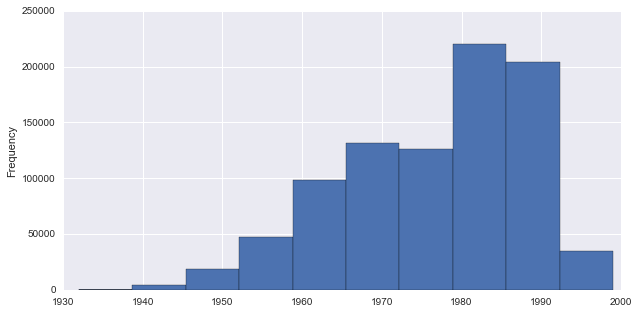

In [11]:
# tripData['birth year'].plot(kind='hist')
tripData[tripData['birth year'] > 1930]['birth year'].plot(kind = 'hist')

In [12]:
# Enter trip duration:
trip_duration_in_minutes = 10

trip_duration = trip_duration_in_minutes * 60.0
x = tripData[tripData.tripduration > trip_duration].shape[0] / float(tripData.shape[0]) * 100
x = round(x,2)
print str(x) +" percent of trips were longer than " + str(trip_duration_in_minutes) +" minutes"

49.81 percent of trips were longer than 10 minutes


/Users/Jonathan/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


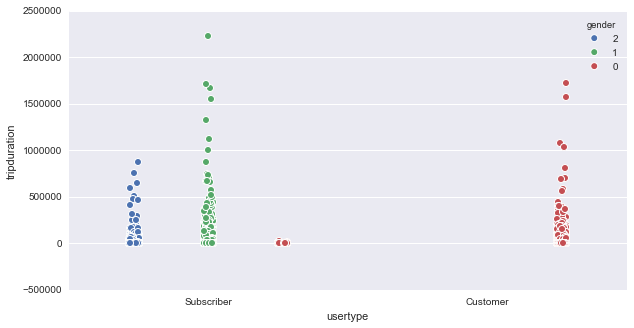

In [15]:
# trip duration by subscriber type & gender
sns.stripplot(x="usertype", y="tripduration", data=tripData, hue='gender', jitter=0.05);